<pre><font size=6>Spoken Emotion Recognition</font></pre>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


About the dataset: https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio<br>
You can download the dataset from here.
<pre>
A small description about the dataset:
Files

This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

File naming convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

Filename identifiers

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 03-01-06-01-02-01-12.wav

Audio-only (03)
Speech (01)
Fearful (06)
Normal intensity (01)
Statement "dogs" (02)
1st Repetition (01)
12th Actor (12)
Female, as the actor ID number is even.
</pre>

In [3]:
import numpy as np
import pandas as pd
import librosa
import os

We shared recordings.zip, please unzip those. 

In [10]:
dir_path='/content/drive/My Drive/Speech Emotion Recognition'
intermediate_folders=os.listdir(dir_path)
all_files=[]
all_paths=[]
for folders in intermediate_folders:
    if 'Images' not in folders:
      files=os.listdir(dir_path+'/'+folders)
    
      all_files.extend(files)
      for i in files:
        all_paths.append(dir_path+'/'+folders+'/'+i)
print(len(all_files),len(all_paths))

1440 1440


In [11]:
emotion_class={1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surprised'}
intensity_class={1:'normal',2:'strong'}
statement_class={1 : "Kids are talking by the door", 2 : "Dogs are sitting by the door"}
repitition_class={1 : '1st repetition', 2 : '2nd repetition'}
Modality=[]
channel=[]
Emotion=[]
intensity=[]
statement=[]
repitition=[]
actor=[]
gender=[]
audio_path=[]
for i in all_files:
  i=i[:-4]
  i=i.split('-')
  Modality.append(i[0])
  channel.append(i[1])
  Emotion.append(i[2])
  intensity.append(i[3])
  statement.append(i[4])
  repitition.append(i[5])
  actor.append(i[6])
  audio_path.append(dir_path+'/')
  if(int(i[6])%2==0):
    gender.append('1')
  else:
    gender.append('0')

In [12]:
import pandas as pd
columns=['Modality','channel','Emotion','intensity','statement','repitition','actor','gender','audio_path']
zipped=zip(Modality,channel,Emotion,intensity,statement,repitition,actor,gender,all_paths)
data=pd.DataFrame(zipped,columns=columns)
print(data.shape)

(1440, 9)


In [13]:
data.head(2)

,Modality,channel,Emotion,intensity,statement,repitition,actor,gender,audio_path
0,03,01,01,01,01,01,03,0,/content/drive/My Drive/Speech Emotion Recogni...
1,03,01,01,01,02,01,03,0,/content/drive/My Drive/Speech Emotion Recogni...


<pre><font size=4>Train and Validation split</font></pre>

In [14]:
X=data.drop('Emotion',axis=1)
Y=data['Emotion']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,stratify=Y)

In [16]:
print(X_train.shape,X_test.shape)

(1008, 8) (432, 8)


In [17]:
sample_rate = 5513
def load_wav(x, get_duration=True):
    samples, sample_rate = librosa.load(x, sr=5513)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [18]:
X_train_processed=[]
X_test_processed=[]
for i in X_train['audio_path']:
    X_train_processed.append(load_wav(i,get_duration=True))
for i in X_test['audio_path']:
    X_test_processed.append(load_wav(i,get_duration=True))

In [19]:
print(len(X_train_processed[0]),len(X_train_processed[0][0]),X_train_processed[0][1])

2 18396 3.3368401959005984


In [13]:
train_duration=[]
test_duration=[]
for i in range(0,len(X_train_processed)):
    train_duration.append(X_train_processed[i][1])
for i in range(0,len(X_test_processed)):
    test_duration.append(X_test_processed[i][1])

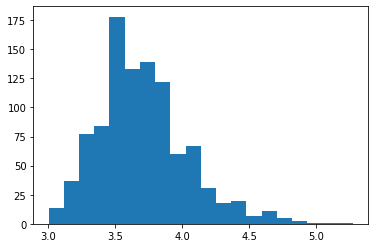

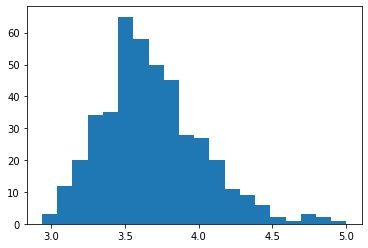

In [14]:
n_bins=20
import matplotlib.pyplot as plt
plt.hist(train_duration,bins=n_bins)
plt.show()
plt.hist(test_duration,bins=n_bins)
plt.show()

In [15]:
for i in range(0,101,10):
    p=np.percentile(train_duration,i)
    print('{}th percentile: {}'.format(i,p))

0th percentile: 3.003083620533285
10th percentile: 3.303464538363867
20th percentile: 3.4367857790676584
30th percentile: 3.5369127516778525
40th percentile: 3.603664066751315
50th percentile: 3.670415381824778
60th percentile: 3.7371666968982407
70th percentile: 3.8372936695084348
80th percentile: 3.97079629965536
90th percentile: 4.137493197895883
100th percentile: 5.272084164701615


In [16]:
for i in range(90,101):
    p=np.percentile(train_duration,i)
    print('{}th percentile: {}'.format(i,p))

90th percentile: 4.137493197895883
91th percentile: 4.170868855432614
92th percentile: 4.204244512969345
93th percentile: 4.2376201705060765
94th percentile: 4.270995828042808
95th percentile: 4.337747143116271
96th percentile: 4.371122800653002
97th percentile: 4.471249773263196
98th percentile: 4.60007981135498
99th percentile: 4.671503718483584
100th percentile: 5.272084164701615


In [17]:
print(int(4.1*sample_rate))

22603


In [20]:
X_train_processed=pd.DataFrame(X_train_processed,columns=['raw_data','duration'])
X_test_processed=pd.DataFrame(X_test_processed,columns=['raw_data','duration'])

<pre>Based on the analysis 90 percentile values are less than 4.13 sec so we will limit maximum length of X_train_processed and X_test_processed to 4.1 sec. It is similar to pad_sequence for a text dataset. 

While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 5513. so, our maximum length is 4.1*5513 = 22603

Pad with Zero if length of sequence is less than 22603 else Truncate the number. 

Also create a masking vector for train and test.

masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.
</pre>

### 2. data augmentation  
<pre>
There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.
Here, we will implement both of the above types
</pre>

In [13]:
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

In [20]:
from tqdm import tqdm
aug_temp = generate_augmented_data(all_paths[0])
augmented_data=[]
for i in tqdm(range(0,len(all_paths))):
  temp_path = all_paths[i]
  aug_temp = generate_augmented_data(temp_path)
  augmented_data.append(aug_temp)
augmented_data=np.asarray(augmented_data)
print(augmented_data.shape)

100%|██████████| 1440/1440 [19:44<00:00,  1.22it/s]

(1440, 9)


In [21]:
print(augmented_data[0][2].shape)
aug_data=[]
for i in range(0,1440):
  for j in range(9):
    aug_data.append(augmented_data[i][j])
print(len(aug_data))

(27648,)
12960


In [22]:
print(len(aug_data),len(aug_data[0]))
aug_data=np.array(aug_data)

12960 27648


In [23]:
Y_augmented=[]
for i in range(len(Y)):
  for j in range(9):
    Y_augmented.append(Y[i])
print(len(Y_augmented))

12960


In [24]:
Y_augmented=np.array(Y_augmented)

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(aug_data,Y_augmented,test_size=0.33,stratify=Y_augmented)
print(X_train.shape,X_test.shape,Y_train.shape)

(8683,) (4277,) (8683,)


In [26]:
X_train_processed=pd.DataFrame(X_train,columns=['raw_data'])
X_test_processed=pd.DataFrame(X_test,columns=['raw_data'])
print(X_train_processed.shape,X_test_processed.shape)

(8683, 1) (4277, 1)


In [27]:
max_length=int(4.6*sample_rate)

In [28]:
X_train_pad_seq_aug=np.zeros(shape=(8683,max_length))
X_test_pad_seq_aug=np.zeros(shape=(4277,max_length))
X_train_mask_aug=np.zeros(shape=(8683,max_length),dtype=bool)
X_test_mask_aug=np.zeros(shape=(4277,max_length),dtype=bool)
for i in range(0,len(X_train_processed)):
    x1=X_train_processed.iloc[i]
    x1=x1[0]
    mask=np.ones(len(x1))
    if len(x1) <max_length:
        x=np.zeros(max_length-len(x1))
        x1=np.append(x1,x)
        mask=np.append(mask,x)
    if len(x1) > max_length:
        x1=x1[0:max_length]
        mask=mask[0:max_length]
    X_train_mask_aug[i]=mask
    X_train_pad_seq_aug[i]=x1

for i in range(0,len(X_test_processed)):
    x1=X_test_processed.iloc[i]
    x1=x1[0]
    mask=np.ones(len(x1))
    if len(x1) <max_length:
        x=np.zeros(max_length-len(x1))
        x1=np.append(x1,x)
        mask=np.append(mask,x)
    if len(x1) > max_length:
        x1=x1[0:max_length]
        mask=mask[0:max_length]
    X_test_mask_aug[i]=mask
    X_test_pad_seq_aug[i]=x1

In [29]:
print(type(X_train[0]),type(X_test[0]),type(Y_train),type(Y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
Y_train=Y_train.astype(int)
Y_test=Y_test.astype(int)

In [31]:
Y_tr=[]
Y_tst=[]
for i in Y_train:
  Y_tr.append(i-1)
for i in Y_test:
  Y_tst.append(i-1) 

In [32]:
import tensorflow as tf
Y_tr=tf.keras.utils.to_categorical(Y_tr,8)
Y_tst=tf.keras.utils.to_categorical(Y_tst,8)

### 3. Converting into spectrogram
<pre>
We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram
</pre>

As discussed above, for one data point, we will get 9 augmented data points.  
We have 1440 data points(train plus test) so, after augmentation we will get 12960 ( train - 8683, test - 4277). 

do the above steps i.e training with raw data and spectrogram data with augmentation.

In [21]:
def convert_to_spectrogram(raw_data):
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [34]:
X_train_spectrogram_aug=[]
X_test_spectrogram_aug=[]
for i in range(0,len(X_train_pad_seq_aug)):
  X_train_spectrogram_aug.append(convert_to_spectrogram(X_train_pad_seq_aug[i]))
for i in range(0,len(X_test_pad_seq_aug)):
  X_test_spectrogram_aug.append(convert_to_spectrogram(X_test_pad_seq_aug[i]))

In [35]:
X_train_spectrogram_aug=np.array(X_train_spectrogram_aug)
X_test_spectrogram_aug=np.array(X_test_spectrogram_aug)

In [36]:
print(X_train_spectrogram_aug.shape,data.shape)

(8683, 64, 50) (1440, 9)


In [39]:
from tensorflow.keras import Input,layers,Model,regularizers
ip_pad=Input(shape=(64,50))
l2=layers.Conv1D(32, 4, activation='relu', padding='same')(ip_pad)
l3=layers.MaxPooling1D(4)(l2)
bn_1=layers.BatchNormalization()(l3)
l4=layers.Conv1D(64, 4, activation='relu', padding='same')(bn_1)
l5=layers.MaxPooling1D(4)(l4)
bn_2=layers.BatchNormalization()(l5)
#l6=layers.Flatten()(l5)
l6=layers.Conv1D(64, 4, activation='relu', padding='same')(bn_2)
l7=layers.MaxPooling1D(4)(l6)
bn_3=layers.BatchNormalization()(l7)

l8=layers.LSTM(512,dropout=0.5,activation='relu',kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(0.001))(bn_3)

op=layers.Dense(8,activation='softmax')(l8)
model2=Model(inputs=ip_pad,outputs=op)
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 50)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 64, 32)            6432      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 32)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 32)            128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 64)            8256      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 64)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 64)             256   

In [40]:
from tensorflow.keras import callbacks

from tensorflow.keras.callbacks import ModelCheckpoint
import datetime
tf.keras.backend.clear_session()
model2.compile(optimizer='RMSProp',loss='categorical_crossentropy',metrics=['accuracy'])
model2.fit(X_train_spectrogram_aug,Y_tr,validation_data=(X_test_spectrogram_aug,Y_tst),verbose=1,steps_per_epoch=X_train_spectrogram_aug.shape[0]//8,epochs=75,batch_size=8,validation_steps=X_test_spectrogram_aug.shape[0]//8)

Epoch 1/75
1085/1085 [==============================] - 17s 16ms/step - loss: 3.7373 - accuracy: 0.2384 - val_loss: 2.8249 - val_accuracy: 0.2458
Epoch 2/75
1085/1085 [==============================] - 16s 15ms/step - loss: 2.1984 - accuracy: 0.3507 - val_loss: 1.9728 - val_accuracy: 0.3663
Epoch 3/75
1085/1085 [==============================] - 17s 15ms/step - loss: 1.7901 - accuracy: 0.4008 - val_loss: 1.8100 - val_accuracy: 0.3717
Epoch 4/75
1085/1085 [==============================] - 17s 15ms/step - loss: 1.6596 - accuracy: 0.4255 - val_loss: 1.5419 - val_accuracy: 0.4555
Epoch 5/75
1085/1085 [==============================] - 17s 15ms/step - loss: 1.5724 - accuracy: 0.4512 - val_loss: 1.4899 - val_accuracy: 0.4728
Epoch 6/75
1085/1085 [==============================] - 17s 15ms/step - loss: 1.5045 - accuracy: 0.4763 - val_loss: 1.5868 - val_accuracy: 0.4621
Epoch 7/75
1085/1085 [==============================] - 17s 15ms/step - loss: 1.4602 - accuracy: 0.4906 - val_loss: 1.2895 -

In [43]:
model2.evaluate(X_test_spectrogram_aug,Y_tst,verbose=1)
model2.evaluate(X_train_spectrogram_aug,Y_tr,verbose=1)

272/272 [==============================] - 1s 5ms/step - loss: 0.5098 - accuracy: 0.8464


[0.509787917137146, 0.8463664650917053]

**Converting Spectogram data into Images**

In the below example, we will see by plotting a spectogram data of an augmented data point. We are getting a slight blur plots since we have used data sugmentation techniques here

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm

In [22]:
X_train_spectrogram=[]
X_test_spectrogram=[]
for i in range(0,len(X_train_processed)):
  X_train_spectrogram.append(convert_to_spectrogram(X_train_processed.iloc[i,0]))
for i in range(0,len(X_test_processed)):
  X_test_spectrogram.append(convert_to_spectrogram(X_test_processed.iloc[i,0]))

In [98]:
t=os.listdir('/content/drive/My Drive/Speech Emotion Recognition/Train_Spectogram_Images')
for i in t:
  os.remove('/content/drive/My Drive/Speech Emotion Recognition/Train_Spectogram_Images/'+i)

In [99]:
t=os.listdir('/content/drive/My Drive/Speech Emotion Recognition/Test_Spectogram_Images')
for i in t:
  os.remove('/content/drive/My Drive/Speech Emotion Recognition/Test_Spectogram_Images/'+i)

In [ ]:
from tqdm import tqdm
for i in tqdm(range(0,len(X_train_spectrogram))):
  plt.figure()
  plt.specgram(X_train_spectrogram[i], Fs=sample_rate)
  plt.axis('off')
  plt.savefig('/content/drive/My Drive/Speech Emotion Recognition/Train_Spectogram_Images/train_spectrogram_{}'.format(i)+'.png',transparent=True,pad_inches=0.0,bbox_inches='tight')

In [101]:
for i in tqdm(range(0,len(X_test_spectrogram))):
  plt.figure()
  plt.specgram(X_test_spectrogram[i], Fs=sample_rate)
  plt.axis('off')
  plt.savefig('/content/drive/My Drive/Speech Emotion Recognition/Test_Spectogram_Images/test_spectrogram_{}'.format(i)+'.png',transparent=True,pad_inches=0.0,bbox_inches='tight')
  plt.close()






  0%|          | 0/432 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=64).
  This is separate from the ipykernel package so we can avoid doing imports until





  0%|          | 2/432 [00:00<00:24, 17.35it/s]




  1%|          | 4/432 [00:00<00:24, 17.66it/s]




  1%|▏         | 6/432 [00:00<00:23, 18.22it/s]




  2%|▏         | 8/432 [00:00<00:24, 17.11it/s]




  2%|▏         | 10/432 [00:00<00:23, 17.68it/s]




  3%|▎         | 12/432 [00:00<00:23, 18.07it/s]




  3%|▎         | 14/432 [00:00<00:23, 17.92it/s]




  4%|▎         | 16/432 [00:00<00:22, 18.40it/s]




  4%|▍         | 18/432 [00:00<00:22, 18.77it/s]




  5%|▍         | 20/432 [00:01<00:21, 19.01it/s]




  5%|▌         | 22/432 [00:01<00:22, 18.43it/s]




  6%|▌         | 24/432 [00:01<00:21, 18.72it/s]




  6%|▌         | 26/432 [00:01<00:26, 15.09it/s]




  6%|▋         | 28/432 

In [153]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [ ]:
print(y_train)

In [154]:
Y_tr=[]
Y_tst=[]
for i in y_train:
  Y_tr.append(i-1)
for i in y_test:
  Y_tst.append(i-1) 

In [155]:
import tensorflow as tf
Y_tr=tf.keras.utils.to_categorical(Y_tr,8)
Y_tst=tf.keras.utils.to_categorical(Y_tst,8)

In [123]:
Y_tr=list(Y_tr)
Y_tst=list(Y_tst)

In [124]:
for i in range(len(Y_tr)):
  Y_tr[i]=list(Y_tr[i])
for i in range(len(Y_tst)):
  Y_tst[i]=list(Y_tst[i])

In [164]:
print(emotion_class)

{1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}


In [165]:
Y_train=[]
Y_test=[]
for i in y_train:
  Y_train.append(emotion_class.get(i))
for i in y_test:
  Y_test.append(emotion_class.get(i))

In [166]:
import os
train_paths=os.listdir('/content/drive/My Drive/Speech Emotion Recognition/Train_Spectogram_Images')
test_paths=os.listdir('/content/drive/My Drive/Speech Emotion Recognition/Test_Spectogram_Images')
print(len(test_paths),len(train_paths))
train_zipped=zip(train_paths,Y_train)
test_zipped=zip(test_paths,Y_test)
train_zipped=pd.DataFrame(train_zipped,columns=['path','target'])
test_zipped=pd.DataFrame(test_zipped,columns=['path','target'])

432 1008


In [ ]:
print(train_zipped.head(2),test_zipped.head(2))

In [157]:
print(train_paths[0],Y_tr[0])
print(type(train_zipped['target'].iloc[2]))

train_spectrogram_0.png [0. 0. 0. 1. 0. 0. 0. 0.]
<class 'numpy.ndarray'>


In [167]:
import tensorflow as tf
#datagen=tf.keras.preprocessing.image.ImageDataGenerator()
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=15,width_shift_range=0.1, height_shift_range=0.1,rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
         horizontal_flip=True)

train_generator=datagen.flow_from_dataframe(dataframe=train_zipped, directory='/content/drive/My Drive/Speech Emotion Recognition/Train_Spectogram_Images', x_col="path", y_col="target", 
                                            class_mode="categorical",target_size=(128,128) ,batch_size=32)
test_generator=datagen.flow_from_dataframe(dataframe=test_zipped, directory='/content/drive/My Drive/Speech Emotion Recognition/Test_Spectogram_Images', x_col="path", y_col="target", 
                                            class_mode="categorical",target_size=(128,128) ,batch_size=32)


Found 1008 validated image filenames belonging to 8 classes.
Found 432 validated image filenames belonging to 8 classes.


In [128]:
import tensorflow as tf
IMG_SHAPE = (128,128, 3)
VGG16_MODEL=tf.keras.applications.VGG16(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
for layers in VGG16_MODEL.layers:
  layers.trainable=False

In [132]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers,Model
from tensorflow.keras.layers import Conv2D,Dense

l1 = layers.Conv2D(64,(3,3),padding='same',activation='relu')(VGG16_MODEL.output)

pool = layers.MaxPooling2D(1)(l1)

flatten= layers.Flatten()(pool)
dp1=layers.Dropout(0.4)(flatten)

l3=layers.Dense(32,activation='relu')(flatten)
dp2=layers.Dropout(0.4)(l3)
l4=layers.Dense(16,activation='relu')(l3)
dp2=layers.Dropout(0.3)(l4)
output=layers.Dense(8,activation='softmax')(l4)
model=Model(inputs=VGG16_MODEL.input,outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [136]:
print(train_generator)

In [169]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(lr=0.0001,epsilon=1e-4)
#opt_rms = optimizers.RMSprop(lr=0.0005,decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
import numpy as np
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler
import datetime
tf.keras.backend.clear_session()
np.random.seed(0)
model.fit_generator(generator = train_generator,validation_data=test_generator,steps_per_epoch=len(X_train_spectrogram)//32,validation_steps=len(X_test_spectrogram)//32,epochs=30,verbose=1)

Epoch 1/30
31/31 [==============================] - 10s 322ms/step - loss: 2.0903 - accuracy: 0.1300 - val_loss: 2.0556 - val_accuracy: 0.1562
Epoch 2/30
31/31 [==============================] - 10s 323ms/step - loss: 2.0664 - accuracy: 0.1424 - val_loss: 2.0544 - val_accuracy: 0.1538
Epoch 3/30
31/31 [==============================] - 10s 334ms/step - loss: 2.0540 - accuracy: 0.1404 - val_loss: 2.0437 - val_accuracy: 0.1779
Epoch 4/30
31/31 [==============================] - 11s 358ms/step - loss: 2.0517 - accuracy: 0.1598 - val_loss: 2.0391 - val_accuracy: 0.1779
Epoch 5/30
31/31 [==============================] - 11s 346ms/step - loss: 2.0503 - accuracy: 0.1588 - val_loss: 2.0394 - val_accuracy: 0.1971
Epoch 6/30
31/31 [==============================] - 11s 347ms/step - loss: 2.0451 - accuracy: 0.1732 - val_loss: 2.0467 - val_accuracy: 0.1707
Epoch 7/30
31/31 [==============================] - 11s 350ms/step - loss: 2.0409 - accuracy: 0.1793 - val_loss: 2.0375 - val_accuracy: 0.1707